# **Machine Learning Project**

## Problem Statement

### Business context

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most. The ultimate reward for dedication and loyalty towards an organization and the HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data on the promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.


### Objective

For the upcoming appraisal cycle, the HR team wants to utilize the stored data and leverage machine learning to make a model that will predict if a person is eligible for promotion or not. You, as a data scientist at JMD company, need to come up with the best possible model that will help the HR team to predict if a person is eligible for promotion or not.


### Data Description

- employee_id: Unique ID for the employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other training completed in the previous year on soft skills, technical skills, etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during the previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
promotion = pd.read_csv("/content/drive/MyDrive/employee_promotion.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
promotion.shape ##  Complete the code to view dimensions of the train data
print('There are',promotion.shape[0], 'rows and', promotion.shape[1], 'columns in the dataset')

There are 54808 rows and 13 columns in the dataset


In [ ]:
# let's create a copy of the data
data = promotion.copy()

### Displaying the first few rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
data.head().T ##  Complete the code to view top 5 rows of the data

,0,1,2,3,4
employee_id,65438,65141,7513,2542,48945
department,Sales & Marketing,Operations,Sales & Marketing,Sales & Marketing,Technology
region,region_7,region_22,region_19,region_23,region_26
education,Master's & above,Bachelor's,Bachelor's,Bachelor's,Bachelor's
gender,f,m,m,m,m
recruitment_channel,sourcing,other,sourcing,other,other
no_of_trainings,1,1,1,2,1
age,35,30,34,39,45
previous_year_rating,5.000,5.000,3.000,1.000,3.000
length_of_service,8,4,7,10,2


In [ ]:
# let's view the last 5 rows of the data
data.tail().T ##  Complete the code to view last 5 rows of the data

,54803,54804,54805,54806,54807
employee_id,3030,74592,13918,13614,51526
department,Technology,Operations,Analytics,Sales & Marketing,HR
region,region_14,region_27,region_1,region_9,region_22
education,Bachelor's,Master's & above,Bachelor's,NaN,Bachelor's
gender,m,f,m,m,m
recruitment_channel,sourcing,other,other,sourcing,other
no_of_trainings,1,1,1,1,1
age,48,37,27,29,27
previous_year_rating,3.000,2.000,5.000,1.000,1.000
length_of_service,17,6,3,2,5


### Checking the data types of the columns for the dataset

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


- There are 54808 rows and 13 columns in the dataset out of which 5 are object columns, 6 are integer columns and 2 are float columns.
- 3 columns have less than 54808 rows in it indicating null or missing values.

### Checking for duplicate values

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

There are no duplicate values in the dataset.

### Checking for missing values

In [ ]:
# let's check for missing values in the data
data.isnull().sum() ##  Complete the code to check missing entries in the train data

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [ ]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

,0
employee_id,0.000
department,0.000
region,0.000
education,4.400
gender,0.000
recruitment_channel,0.000
no_of_trainings,0.000
age,0.000
previous_year_rating,7.520
length_of_service,0.000


- `education` column has 4.4% (2409 rows) missing values out of the total.
- `previous_year_rating` column has 7.52% (4124 rows) missing values out of the total.
- `avg_training_score` column has 4.67% (2560 rows)missing values out of the total.

In [ ]:
data["awards_won"].replace(1, "yes", inplace=True)
data["awards_won"].replace(0, "no", inplace=True)

In [ ]:
data["is_promoted"].replace(1, "yes", inplace=True)
data["is_promoted"].replace(0, "no", inplace=True)

### Statistical summary of the dataset

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.000,39195.831,22586.581,1.000,19669.750,39225.500,58730.500,78298.000
no_of_trainings,54808.000,1.253,0.609,1.000,1.000,1.000,1.000,10.000
age,54808.000,34.804,7.660,20.000,29.000,33.000,39.000,60.000
previous_year_rating,50684.000,3.329,1.260,1.000,3.000,3.000,4.000,5.000
length_of_service,54808.000,5.866,4.265,1.000,3.000,5.000,7.000,37.000
avg_training_score,52248.000,63.712,13.522,39.000,51.000,60.000,77.000,99.000


**Observations**
- `enrollee_id:` It is a unique identifier doesn't add any meaning to the analysis so we can drop it.
- `no_of_trainings:` Employees have completed atleast one training on an average. Some employees have done 10 trainings at maximum.
- `age:` Employees age between 20 and 60 were working in the company. 75% of them were less than 40 years.
- `previous_year_rating:` Average rating of an employee is 3.33. Less number of employees got rating less than 3.
- `length_of_service:` Employees on an average work for 6 years in the company. Some employees have experience more than 10 years upto 37 years maximum.
- `avg_training_score:` Average score is 63.7 where some employees have score upto 99.

In [ ]:
data.describe(include = ['object']).T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446
awards_won,54808,2,no,53538
is_promoted,54808,2,no,50140


**Let's check the number of unique values in each column**

In [ ]:
data.nunique()

,0
employee_id,54808
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,35


In [ ]:
# printing the number of occurrences of each unique value in each categorical column
for column in data.columns:
    print("Unique values in", column, "are :")
    print(data[column].value_counts())
    print("-" * 50)

Unique values in employee_id are :
employee_id
65438    1
16223    1
38250    1
68086    1
78080    1
        ..
38645    1
76563    1
46788    1
75029    1
51526    1
Name: count, Length: 54808, dtype: int64
--------------------------------------------------
Unique values in department are :
department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
--------------------------------------------------
Unique values in region are :
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      

In [ ]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
data.drop(columns="employee_id", inplace=True)

In [ ]:
data["is_promoted"].value_counts(1)

,proportion
is_promoted,
no,0.915
yes,0.085


## Exploratory Data Analysis

### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

#### Numerical variable

##### Observations on No. of Trainings

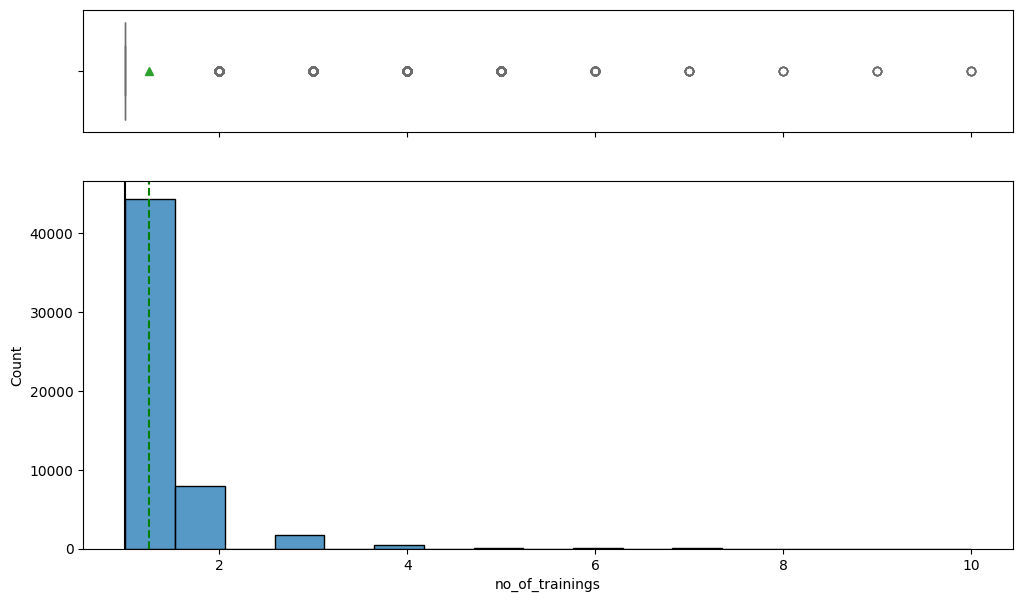

In [ ]:
histogram_boxplot(data, "no_of_trainings")

In [ ]:
data['no_of_trainings'].value_counts()

,count
no_of_trainings,
1,44378
2,7987
3,1776
4,468
5,128
6,44
7,12
8,5
10,5


- This distribution is extremely right skewed and have outliers.
- Employees on an average have completed atleast one training.
- 81% of the employees have done only one training.
- Some employees have done 10 trainings at maximum.

##### Observations on Age

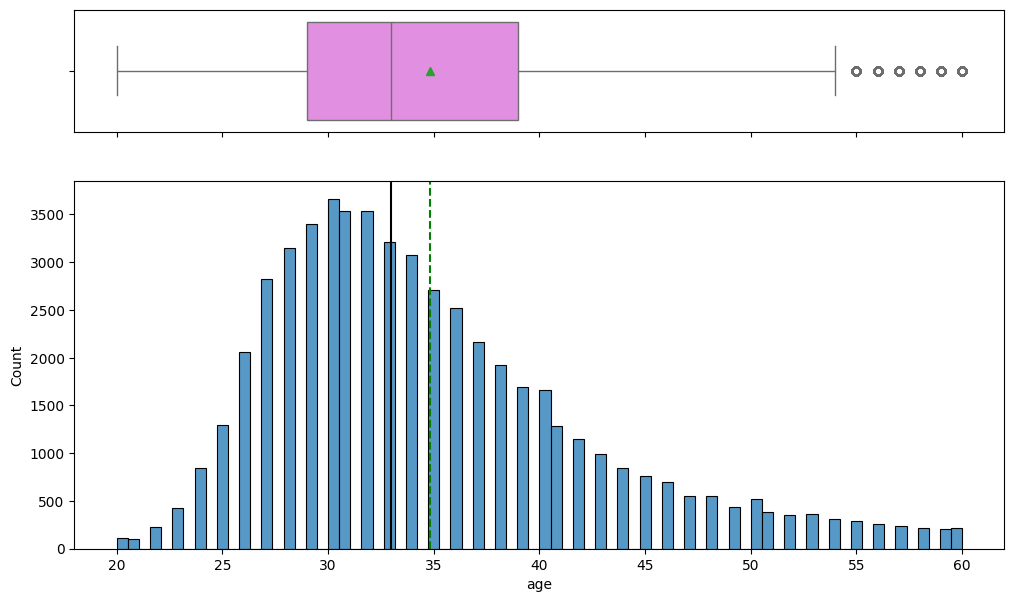

In [ ]:
histogram_boxplot(data,'age')  ## Complete the code to create histogram_boxplot for 'age'

In [ ]:
data_size = data.copy()
bins = [19,29,39,49,59,60]
names = ['20-29','30-39','40-49','50-59','60']
data_size['age_category'] = pd.cut(data['age'], bins, labels=names)
data_size.age_category.value_counts(1)

,proportion
age_category,
30-39,0.511
20-29,0.264
40-49,0.163
50-59,0.058
60,0.004


- This distribution has outliers. Employees having age greater than 55 were outliers.
- Company has employees between 20 and 60 years.
-  Half of the employees were between 30 to 40 years.
- One-fourth of employees were less than 30 years.
- Maximum number of the workers were less than 40 years.

##### Observations on Previous Year Rating

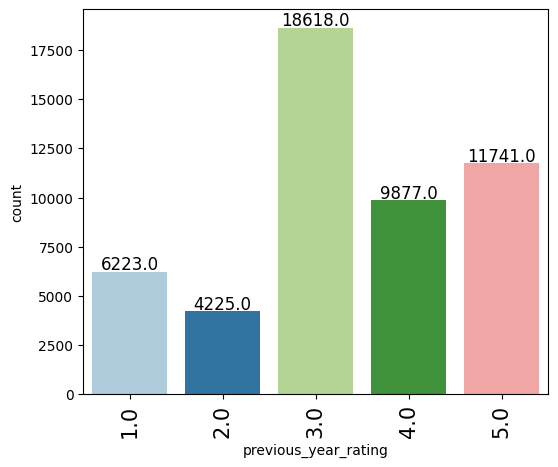

In [ ]:
labeled_barplot(data,'previous_year_rating') ## Complete the code to create labeled_barplot for 'previous_year_rating'

In [ ]:
data['previous_year_rating'].value_counts(1)

,proportion
previous_year_rating,
3.000,0.367
5.000,0.232
4.000,0.195
1.000,0.123
2.000,0.083


- Maximum employees got rating 3 prevoius year.
- 37% of employees got rating 3.
- 20% of employees got rating less than 3.
- 43% of employees got rating more than 3

##### Observations on Length of Service

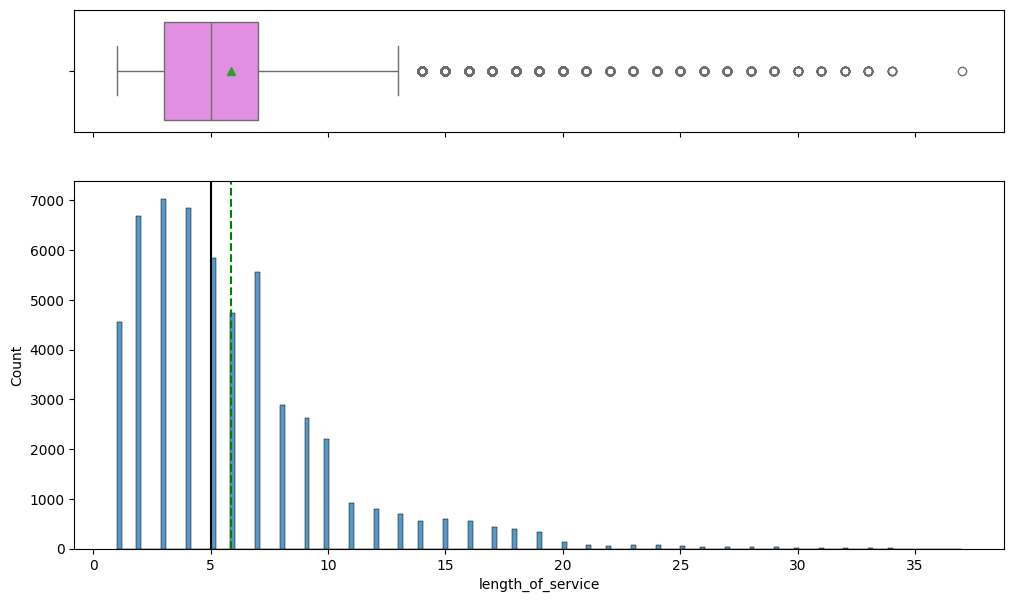

In [ ]:
histogram_boxplot(data,'length_of_service')  ## Complete the code to create histogram_boxplot for 'length_of_service'

In [ ]:
bins = [0,5,10,15,20,25,30,40]
names = ['0-5','6-10','11-15','16-20','21-25','26-30','31-40']
data_size['experience_category'] = pd.cut(data['length_of_service'], bins, labels=names)
data_size.experience_category.value_counts(1)

,proportion
experience_category,
0-5,0.564
6-10,0.328
11-15,0.065
16-20,0.033
21-25,0.006
26-30,0.003
31-40,0.001


- This distribution is extremly right skewed and have outliers.
- Employee on an average works for 6 years in the company.
- 90% of workers have service less than or equal to 10 years.
- 9% of workers have experience between 11 to 20 years.
- Only 1% of employees have experience more than 20 years.



##### Observations on Average Training Score

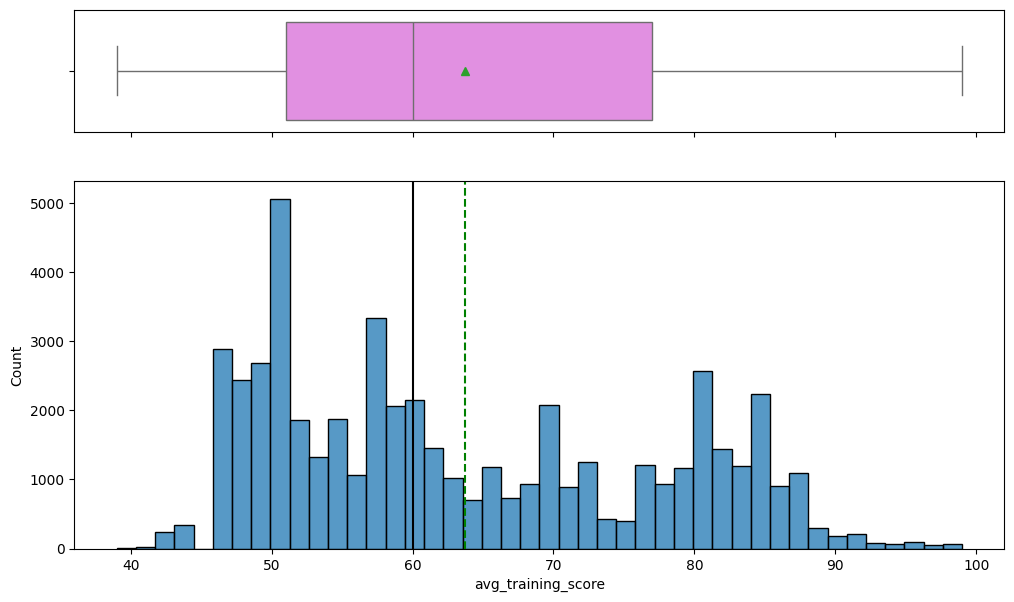

In [ ]:
histogram_boxplot(data,'avg_training_score')  ## Complete the code to create histogram_boxplot for 'avg_training_score'

- There is no outlier in this distribution.
- Average score is 63.7 and median at 60.
- An employee's minimum score is 39 and maximum score upto 99.

#### Categorical variable

##### Observations on Department

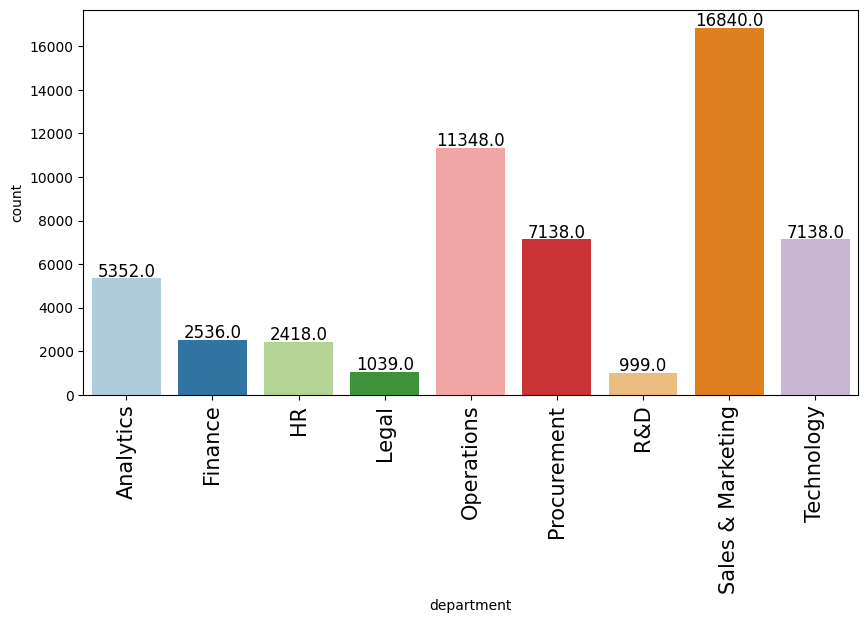

In [ ]:
labeled_barplot(data, "department")

- Highest number of employees were working in sales and marketing team.
- Operations team has second highest number of employees.
- Technology and procurement teams have equal number of workers which is the third highest.
- Least number of employees were working in research and development team.
- Finance, HR and legal also have less number of workers.

##### Observations on Education

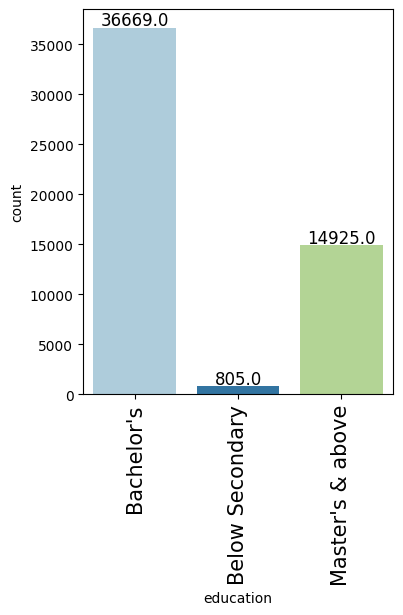

In [ ]:
labeled_barplot(data, "education") ## Complete the code to create labeled_barplot for 'education'

In [ ]:
data['education'].value_counts(1)

,proportion
education,
Bachelor's,0.700
Master's & above,0.285
Below Secondary,0.015


- Most of the employees (70%) have done bachelor's degree.
- 28.5% have done master's & above degree.
- Least number of the employees (1.5%) have done below secondary education.

##### Observations on Gender

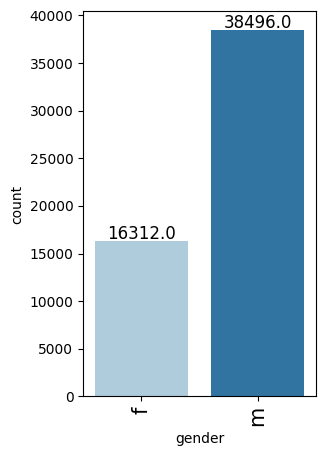

In [ ]:
labeled_barplot(data,'gender') ## Complete the code to create labeled_barplot for 'gender'

In [ ]:
data['gender'].value_counts(1)

,proportion
gender,
m,0.702
f,0.298


70% of employees were male and 30% were female.

##### Observations on Recruitment Channel

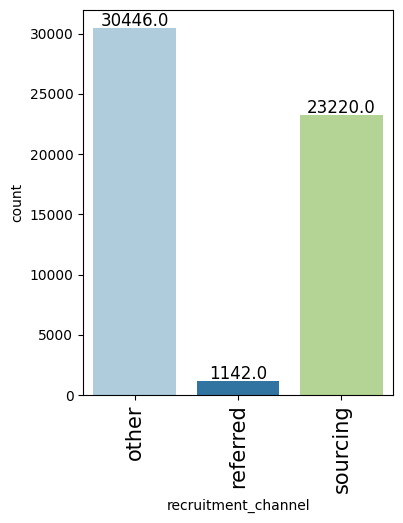

In [ ]:
labeled_barplot(data,'recruitment_channel') ## Complete the code to create labeled_barplot for 'recruitment_channel'

In [ ]:
data['recruitment_channel'].value_counts(1)

,proportion
recruitment_channel,
other,0.556
sourcing,0.424
referred,0.021


- Very less number of employees got placed using referals.
- 42% of employees were placed by sourcing.
- Most were placed by other recruitment channels.

##### Observations on Awards Won

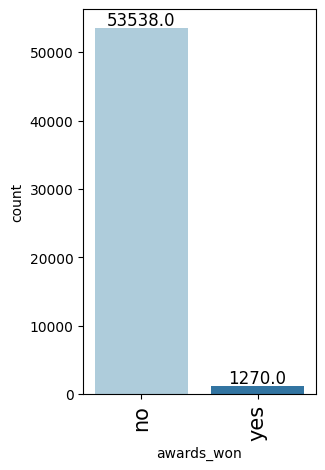

In [ ]:
labeled_barplot(data,'awards_won') ## Complete the code to create labeled_barplot for 'awards_won'

In [ ]:
data['awards_won'].value_counts(1)

,proportion
awards_won,
no,0.977
yes,0.023


98% employees won some awards while rest didn't received any awards.

##### Observations on Region

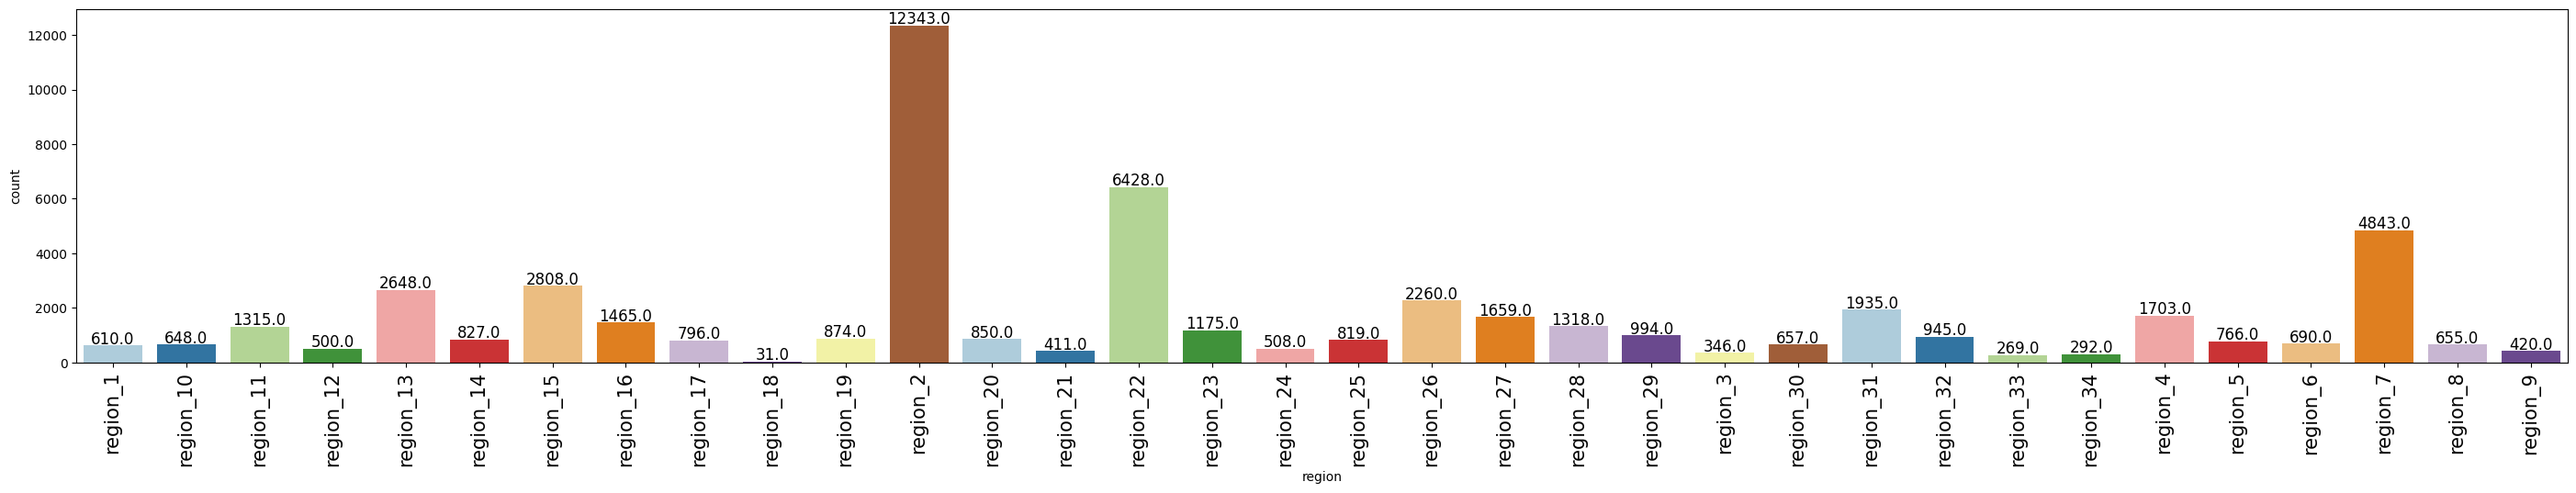

In [ ]:
labeled_barplot(data,'region') ## Complete the code to create labeled_barplot for 'region'

Region 2 has highest number of employees while region 18 has least number of employees.

##### Observations on target variable

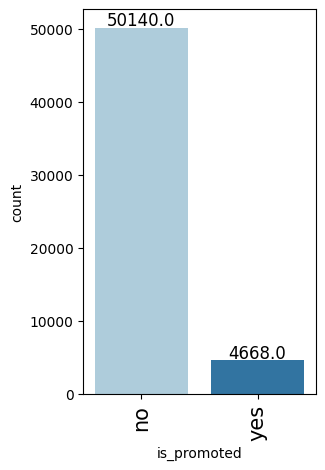

In [ ]:
labeled_barplot(data,'is_promoted') ## Complete the code to create labeled_barplot for 'is_promoted'

In [ ]:
data["is_promoted"].value_counts(1)

,proportion
is_promoted,
no,0.915
yes,0.085


Only 8.5% of employees got promoted by the company.

### Bivariate Analysis

#### Target variable vs Age

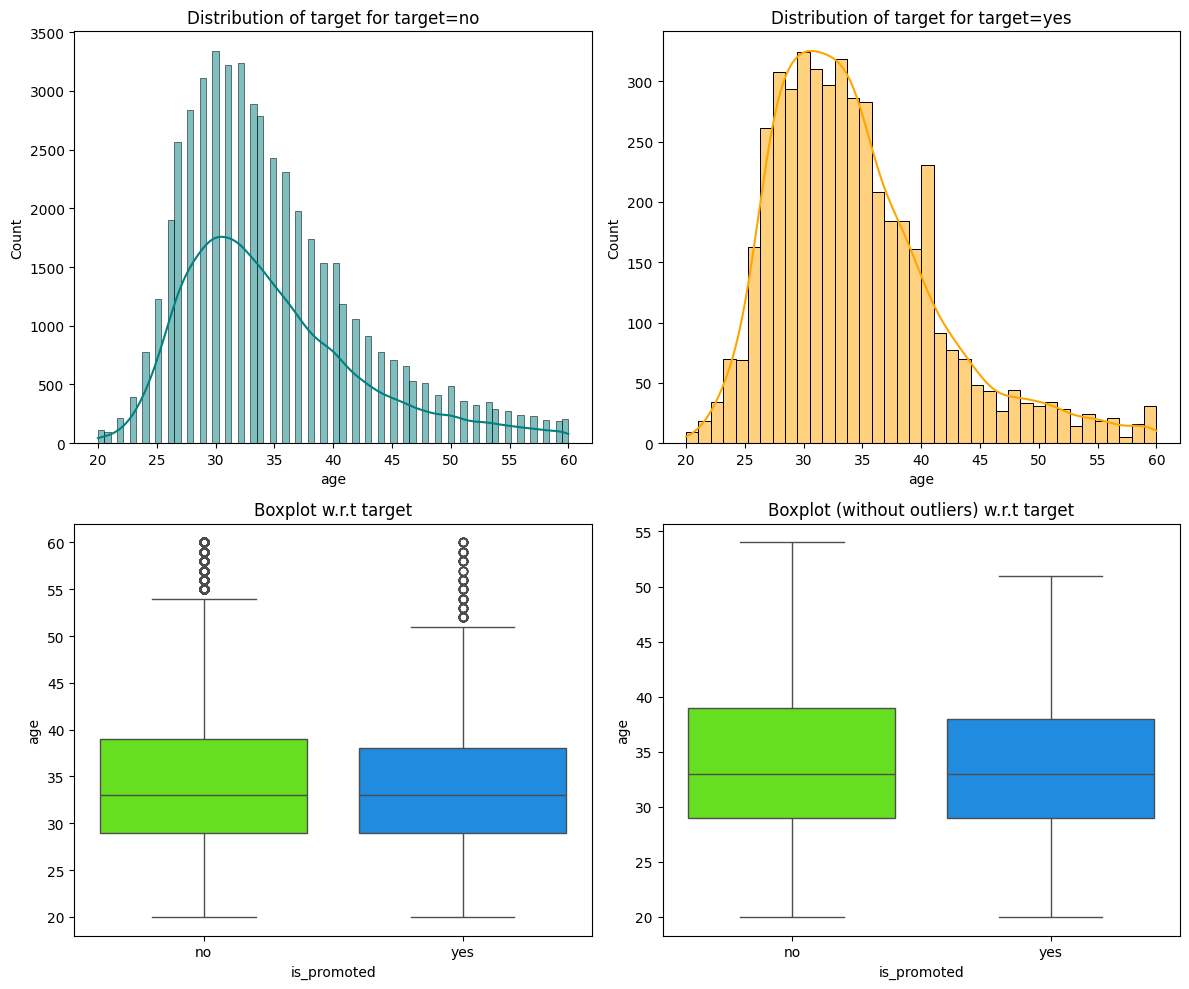

In [ ]:
distribution_plot_wrt_target(data, "age", "is_promoted")

**Let's see the change in length of service (length_of_service) vary by the employee's promotion status (is_promoted)?**

#### Target variable vs Length of Service

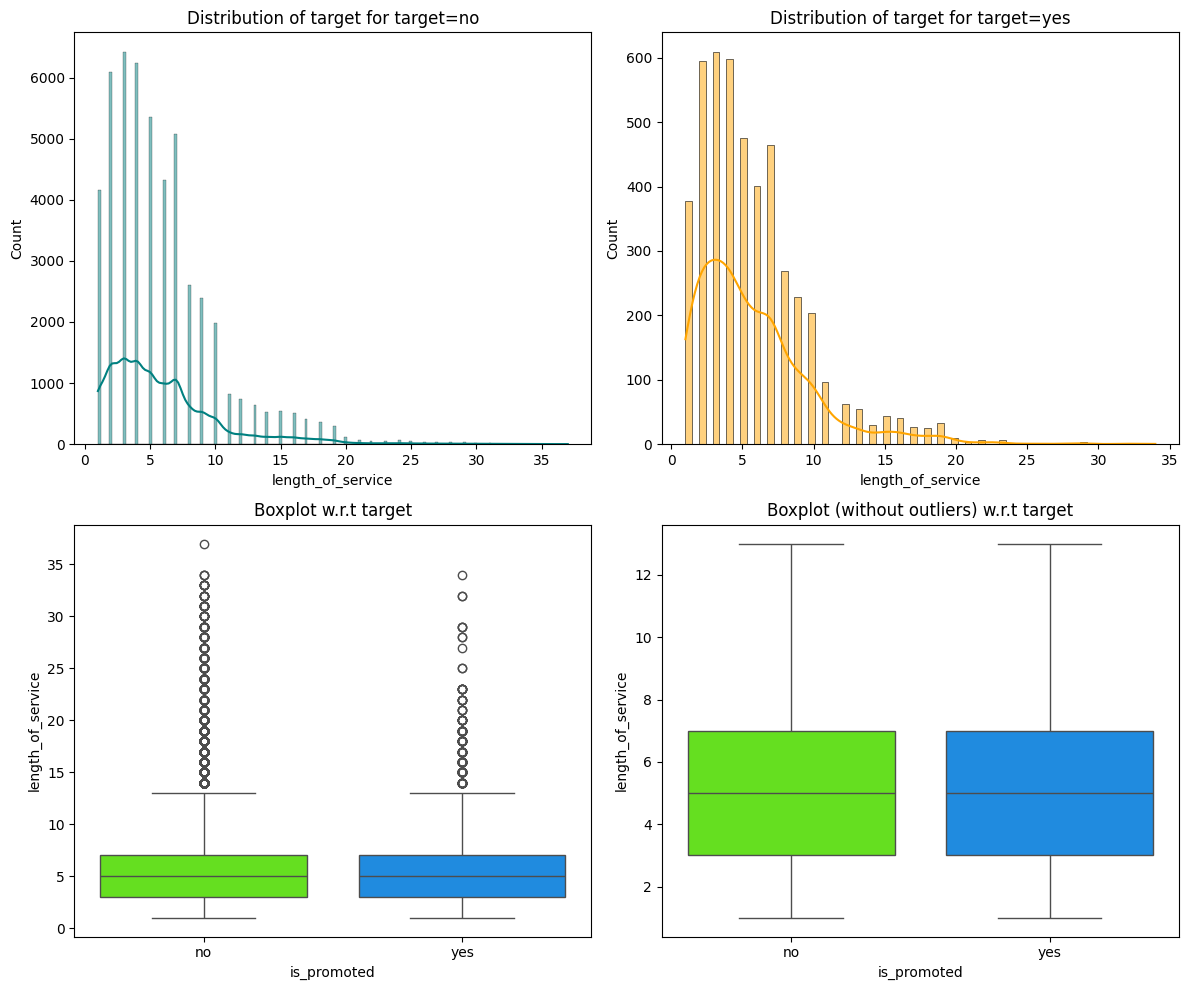

In [ ]:
distribution_plot_wrt_target(data, "length_of_service", "is_promoted")

#### Target variable vs Average Training Score

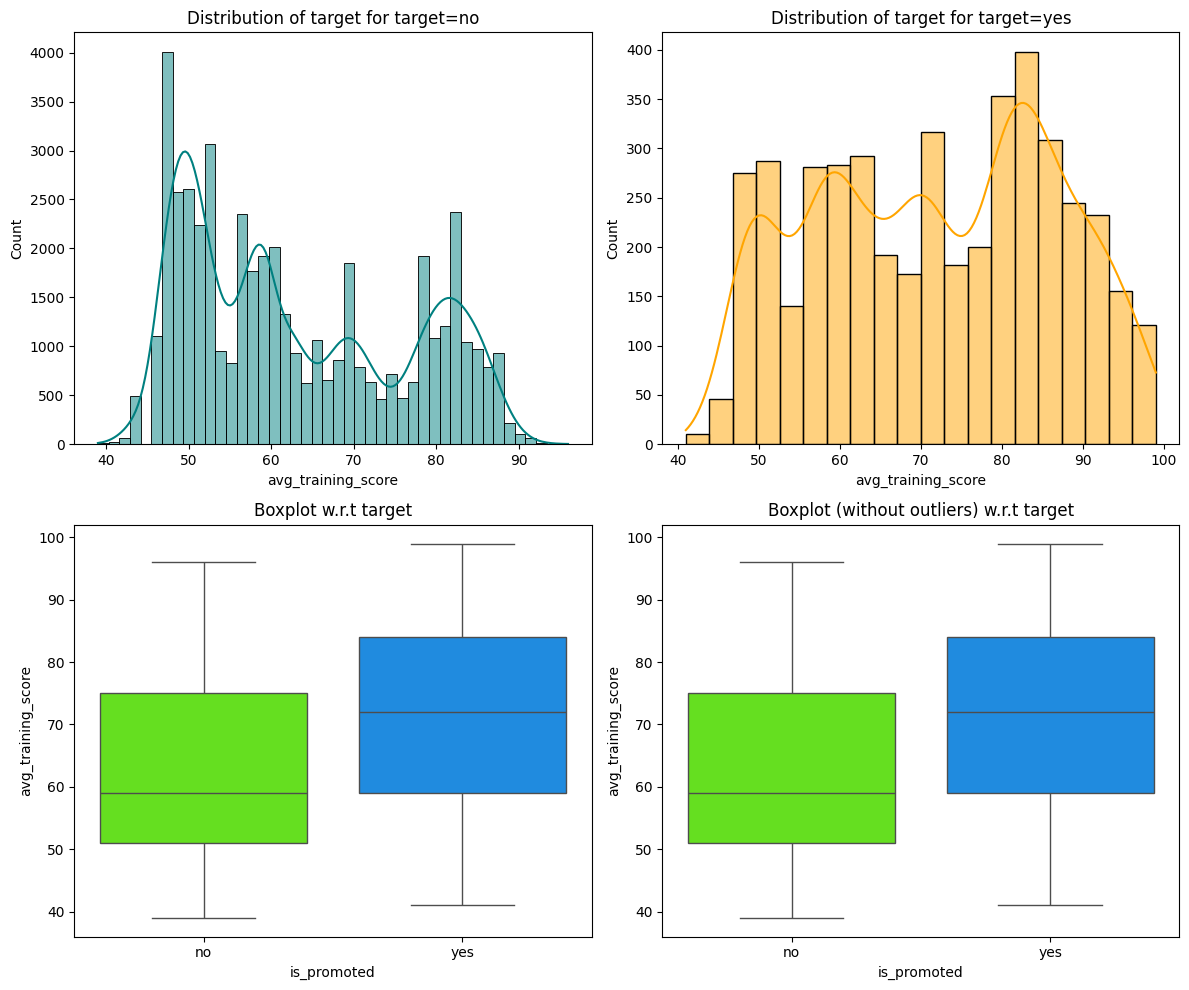

In [ ]:
distribution_plot_wrt_target(data, "avg_training_score", "is_promoted")

#### Target variable vs Department

is_promoted           no   yes    All
department                           
All                50140  4668  54808
Sales & Marketing  15627  1213  16840
Operations         10325  1023  11348
Technology          6370   768   7138
Procurement         6450   688   7138
Analytics           4840   512   5352
Finance             2330   206   2536
HR                  2282   136   2418
R&D                  930    69    999
Legal                986    53   1039
------------------------------------------------------------------------------------------------------------------------


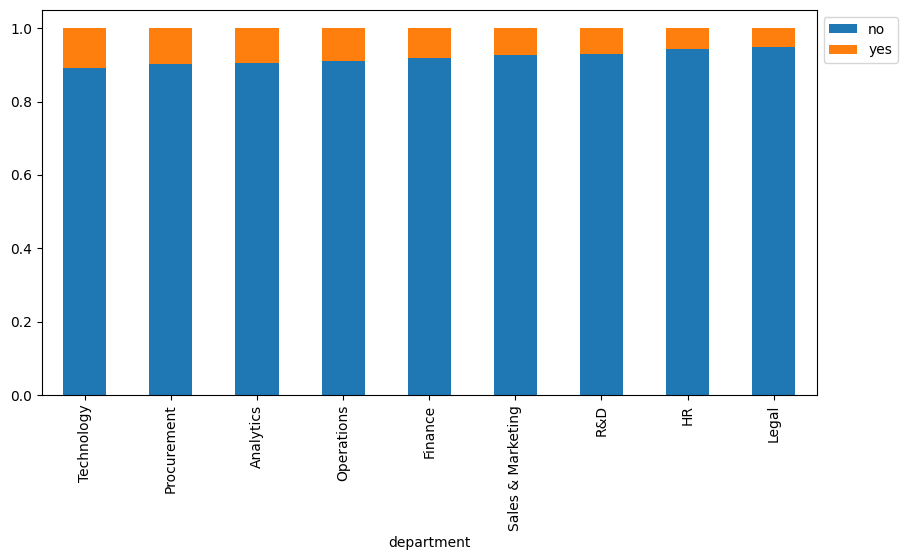

In [ ]:
stacked_barplot(data, "department", "is_promoted")

#### Target variable vs Region

is_promoted     no   yes    All
region                         
All          50140  4668  54808
region_2     11354   989  12343
region_22     5694   734   6428
region_7      4327   516   4843
region_4      1457   246   1703
region_13     2418   230   2648
region_15     2586   222   2808
region_28     1164   154   1318
region_26     2117   143   2260
region_23     1038   137   1175
region_27     1528   131   1659
region_31     1825   110   1935
region_17      687   109    796
region_25      716   103    819
region_16     1363   102   1465
region_11     1241    74   1315
region_14      765    62    827
region_30      598    59    657
region_1       552    58    610
region_19      821    53    874
region_8       602    53    655
region_10      597    51    648
region_20      801    49    850
region_29      951    43    994
region_32      905    40    945
region_3       309    37    346
region_5       731    35    766
region_12      467    33    500
region_6       658    32    690
region_2

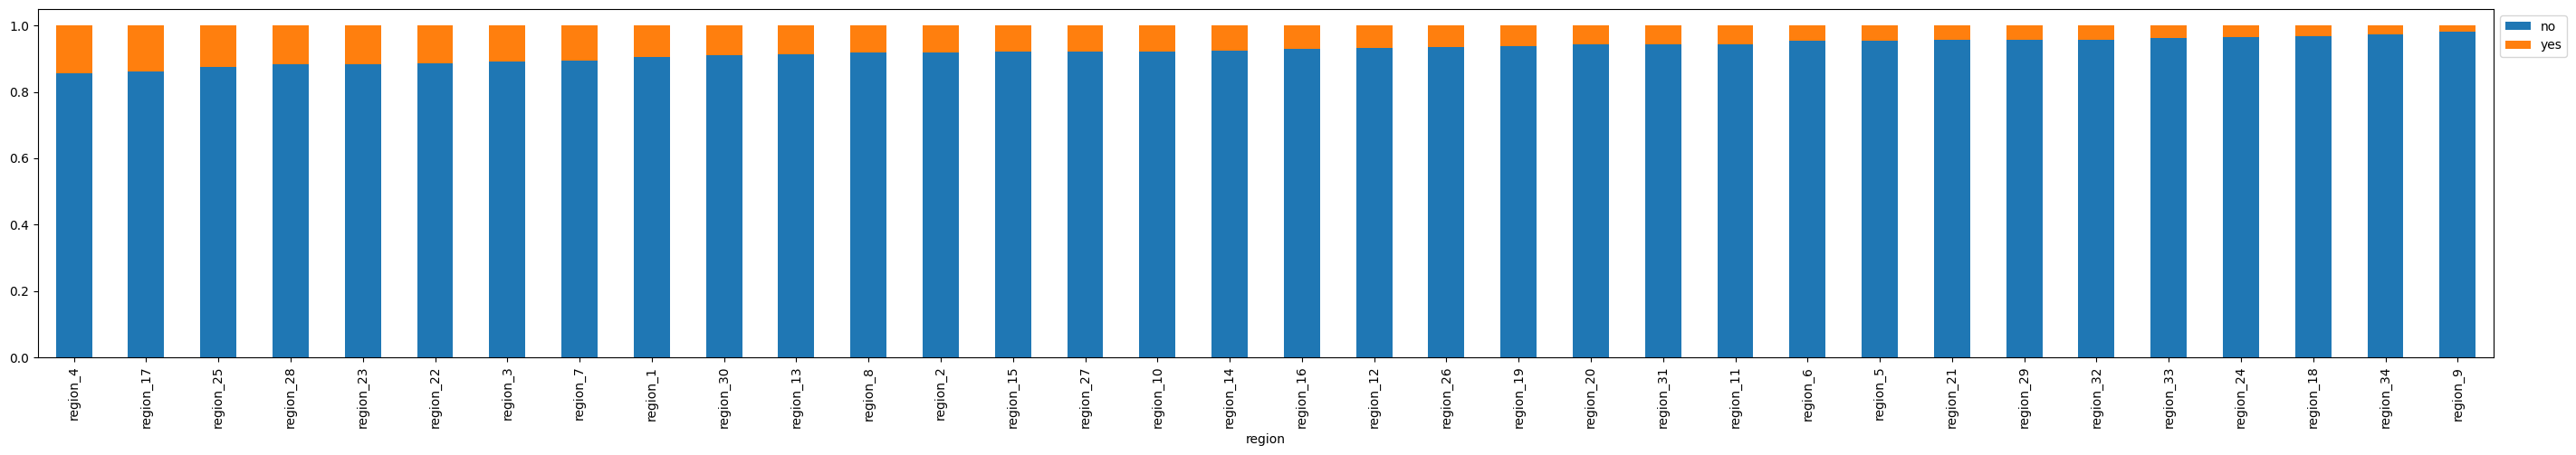

In [ ]:
stacked_barplot(data, "region", "is_promoted")

#### Target variable vs Education

is_promoted          no   yes    All
education                           
All               47853  4546  52399
Bachelor's        33661  3008  36669
Master's & above  13454  1471  14925
Below Secondary     738    67    805
------------------------------------------------------------------------------------------------------------------------


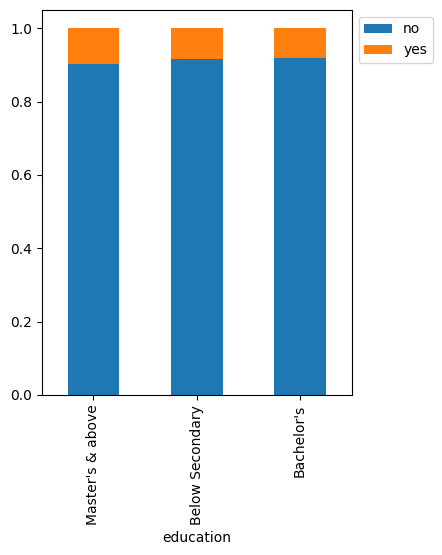

In [ ]:
stacked_barplot(data,"education", "is_promoted")

#### Target variable vs Gender

is_promoted     no   yes    All
gender                         
All          50140  4668  54808
m            35295  3201  38496
f            14845  1467  16312
------------------------------------------------------------------------------------------------------------------------


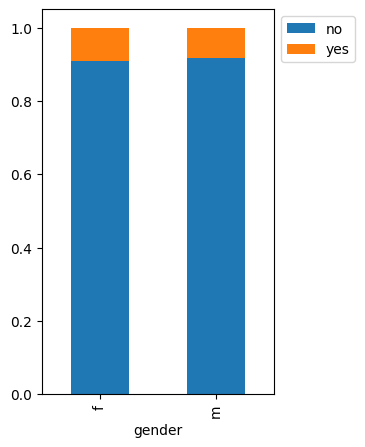

In [ ]:
stacked_barplot(data,"gender", "is_promoted")

#### Target variable vs Recruitment Channel

is_promoted             no   yes    All
recruitment_channel                    
All                  50140  4668  54808
other                27890  2556  30446
sourcing             21246  1974  23220
referred              1004   138   1142
------------------------------------------------------------------------------------------------------------------------


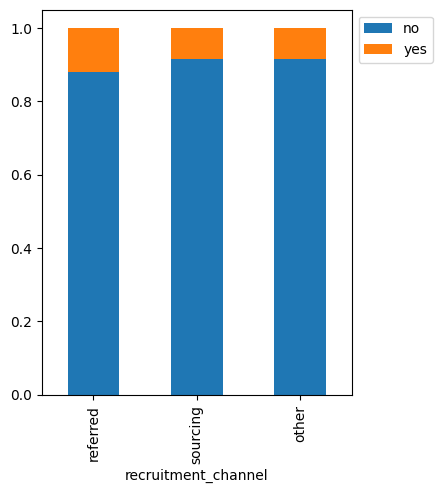

In [ ]:
stacked_barplot(data,"recruitment_channel", "is_promoted") ## Complete the code to create distribution_plot for recruitment_channel vs is_promoted

#### Target variable vs Previous Year Rating

is_promoted              no   yes    All
previous_year_rating                    
 All                  46355  4329  50684
5.000                  9820  1921  11741
3.000                 17263  1355  18618
4.000                  9093   784   9877
2.000                  4044   181   4225
1.000                  6135    88   6223
------------------------------------------------------------------------------------------------------------------------


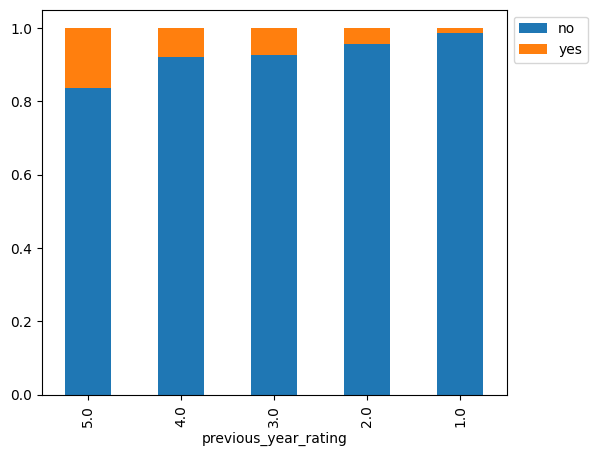

In [ ]:
stacked_barplot(data,"previous_year_rating", "is_promoted")

#### Target variable vs No of Trainings

is_promoted         no   yes    All
no_of_trainings                    
All              50140  4668  54808
1                40468  3910  44378
2                 7382   605   7987
3                 1654   122   1776
4                  442    26    468
5                  125     3    128
6                   42     2     44
7                   12     0     12
8                    5     0      5
9                    5     0      5
10                   5     0      5
------------------------------------------------------------------------------------------------------------------------


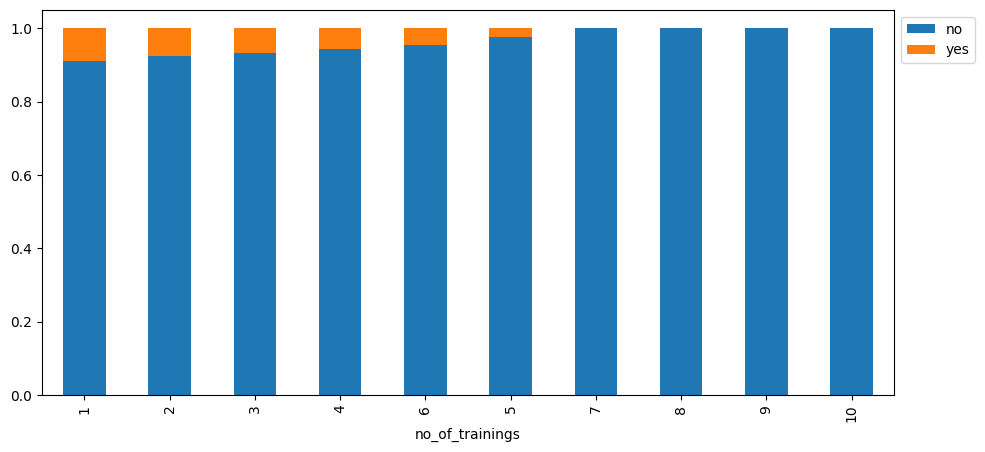

In [ ]:
stacked_barplot(data,"no_of_trainings", "is_promoted")

#### Target variable vs Awards Won

is_promoted     no   yes    All
awards_won                     
All          50140  4668  54808
no           49429  4109  53538
yes            711   559   1270
------------------------------------------------------------------------------------------------------------------------


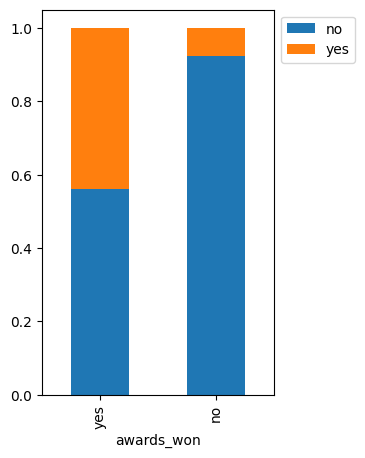

In [ ]:
stacked_barplot(data,"awards_won", "is_promoted")

#### Average training score vs Awards Won

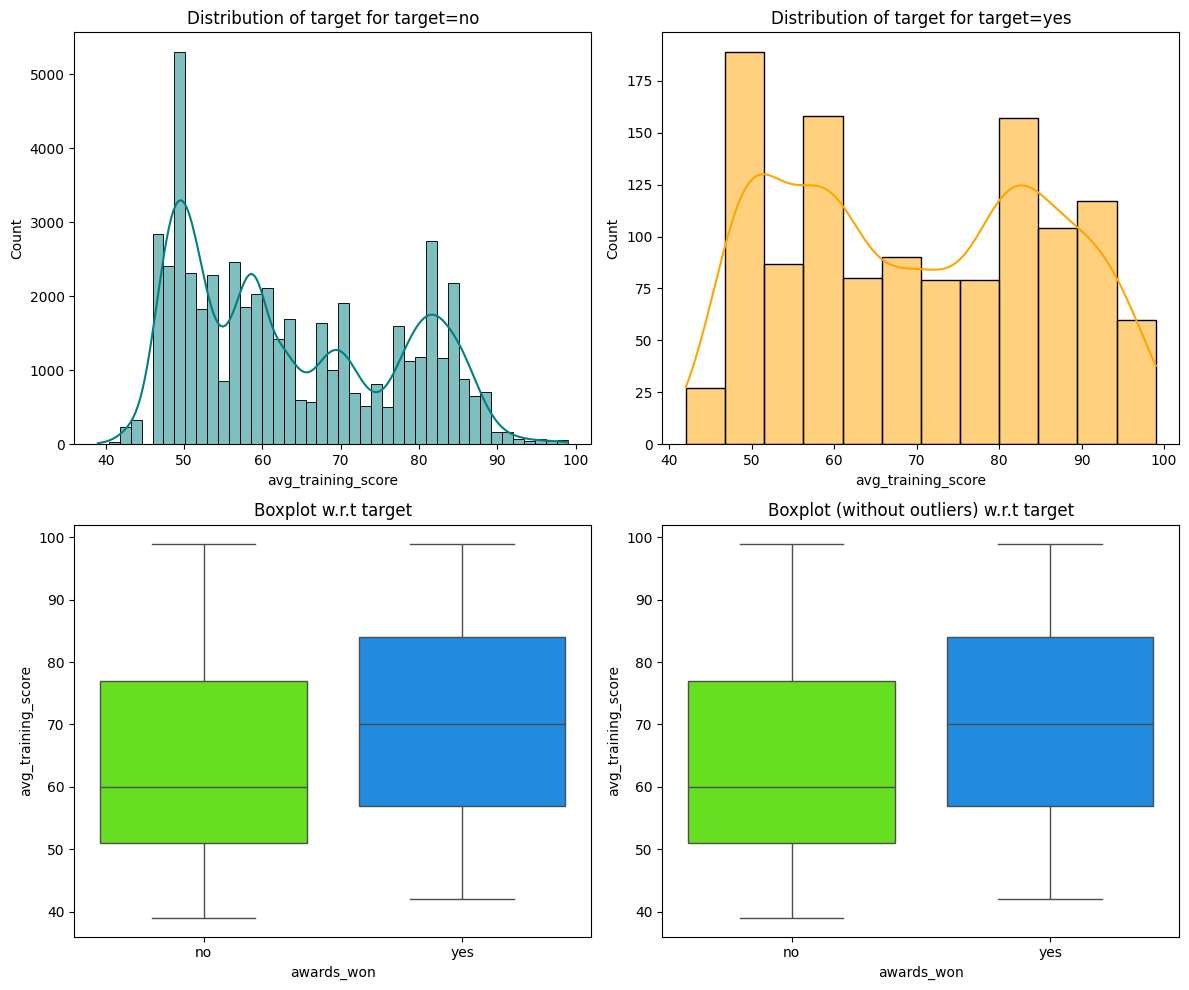

In [ ]:
distribution_plot_wrt_target(data, "avg_training_score", "awards_won")

#### Region Vs Department

department  Analytics  Finance    HR  Legal  Operations  Procurement  R&D  \
region                                                                      
All              5352     2536  2418   1039       11348         7138  999   
region_22        1114      335   330    233        1546          594  264   
region_2          751      826   914    367        2133         2046  195   
region_7          389      220   236    100         884          673   94   
region_26         246      152    91     40         396          258   90   
region_4          135      100    46     11         468          191   68   
region_11         128       57    41     22         281          174   47   
region_15         234       76    67     18         965          360   31   
region_31         262       77    74     33         416          196   30   
region_13         133       87    83     32         540          425   26   
region_27         134       67    53     52         381          193   25   

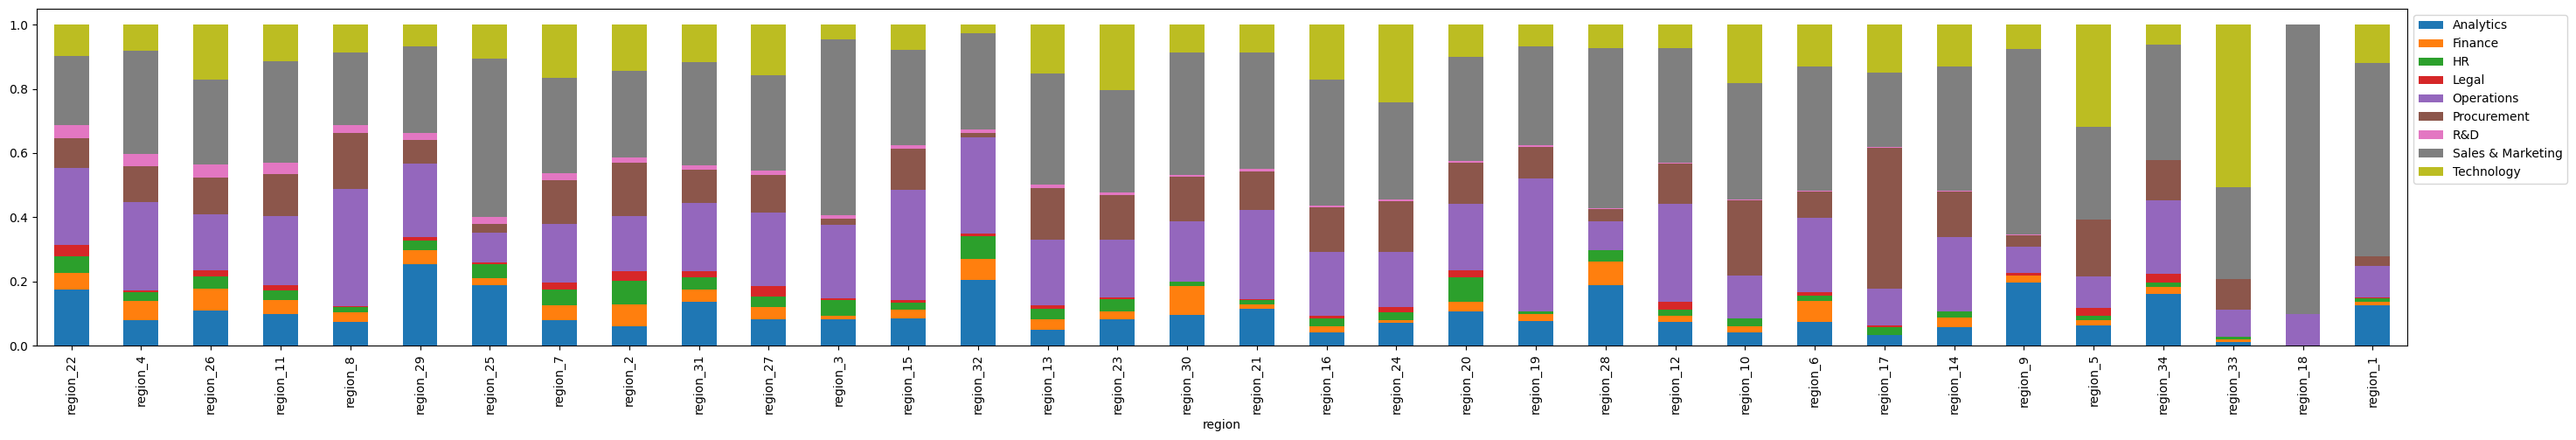

In [ ]:
stacked_barplot(data, "region", 'department')

awards_won     no   yes    All
region                        
All         53538  1270  54808
region_2    12073   270  12343
region_22    6269   159   6428
region_7     4735   108   4843
region_13    2577    71   2648
region_15    2739    69   2808
region_4     1655    48   1703
region_28    1272    46   1318
region_31    1890    45   1935
region_26    2217    43   2260
region_27    1621    38   1659
region_16    1427    38   1465
region_23    1138    37   1175
region_17     767    29    796
region_20     824    26    850
region_11    1290    25   1315
region_32     923    22    945
region_30     637    20    657
region_29     976    18    994
region_25     802    17    819
region_14     810    17    827
region_19     859    15    874
region_8      640    15    655
region_6      676    14    690
region_12     487    13    500
region_5      756    10    766
region_1      600    10    610
region_24     499     9    508
region_9      411     9    420
region_3      338     8    346
region_3

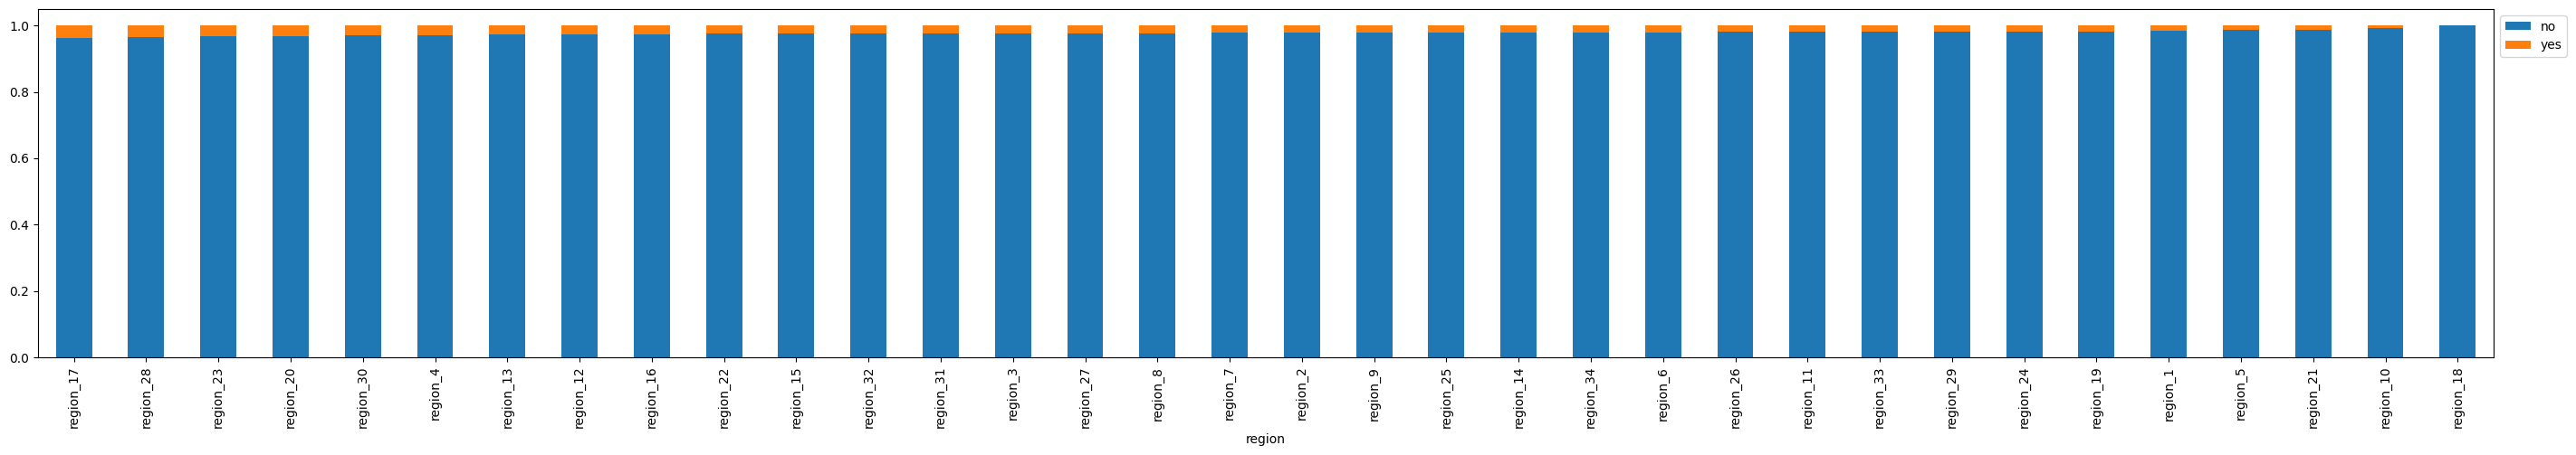

In [ ]:
stacked_barplot(data, "region", 'awards_won')

#### Department Vs Education

education          Bachelor's  Below Secondary  Master's & above    All
department                                                             
All                     36669              805             14925  52399
Technology               4642              201              2196   7039
Operations               7781              176              3165  11122
Procurement              4393              129              2544   7066
HR                       1525              128               733   2386
Finance                  1895              106               499   2500
Legal                     814               65               156   1035
Analytics                3978                0              1037   5015
R&D                       542                0               429    971
Sales & Marketing       11099                0              4166  15265
------------------------------------------------------------------------------------------------------------------------


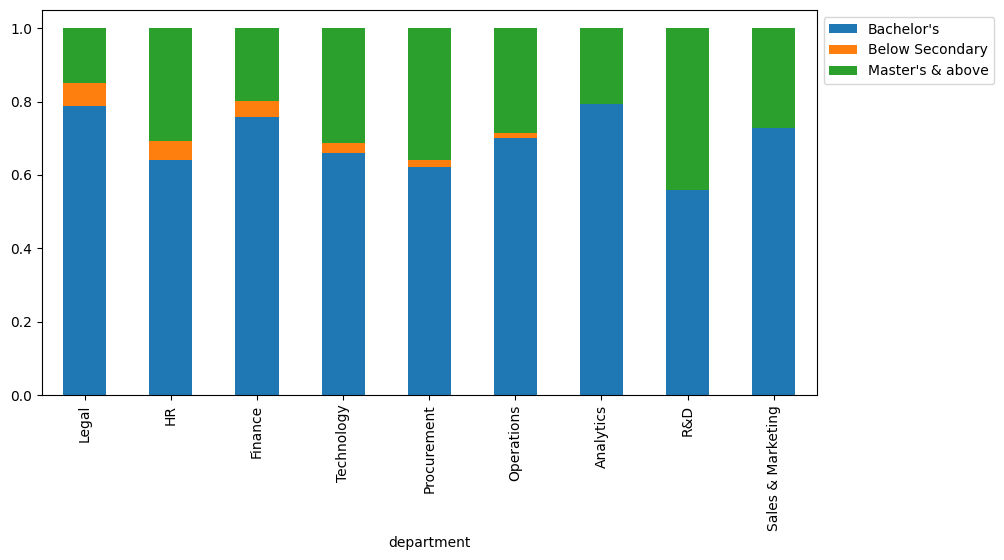

In [ ]:
stacked_barplot(data, "department", 'education')

**Let's see the attributes that have a strong correlation with each other**

#### Correlation Heatmap

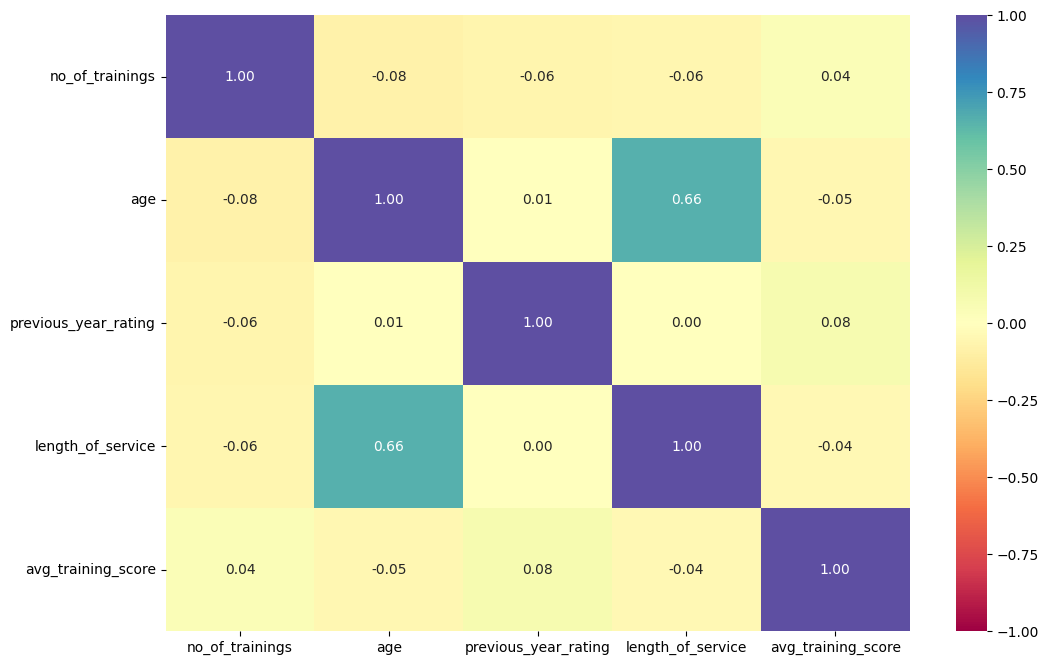

In [ ]:
# Check for correlation among numerical variables
num_var = data.select_dtypes(include=np.number).columns.tolist()

corr = data[num_var].corr()

# plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

#### Pair plot

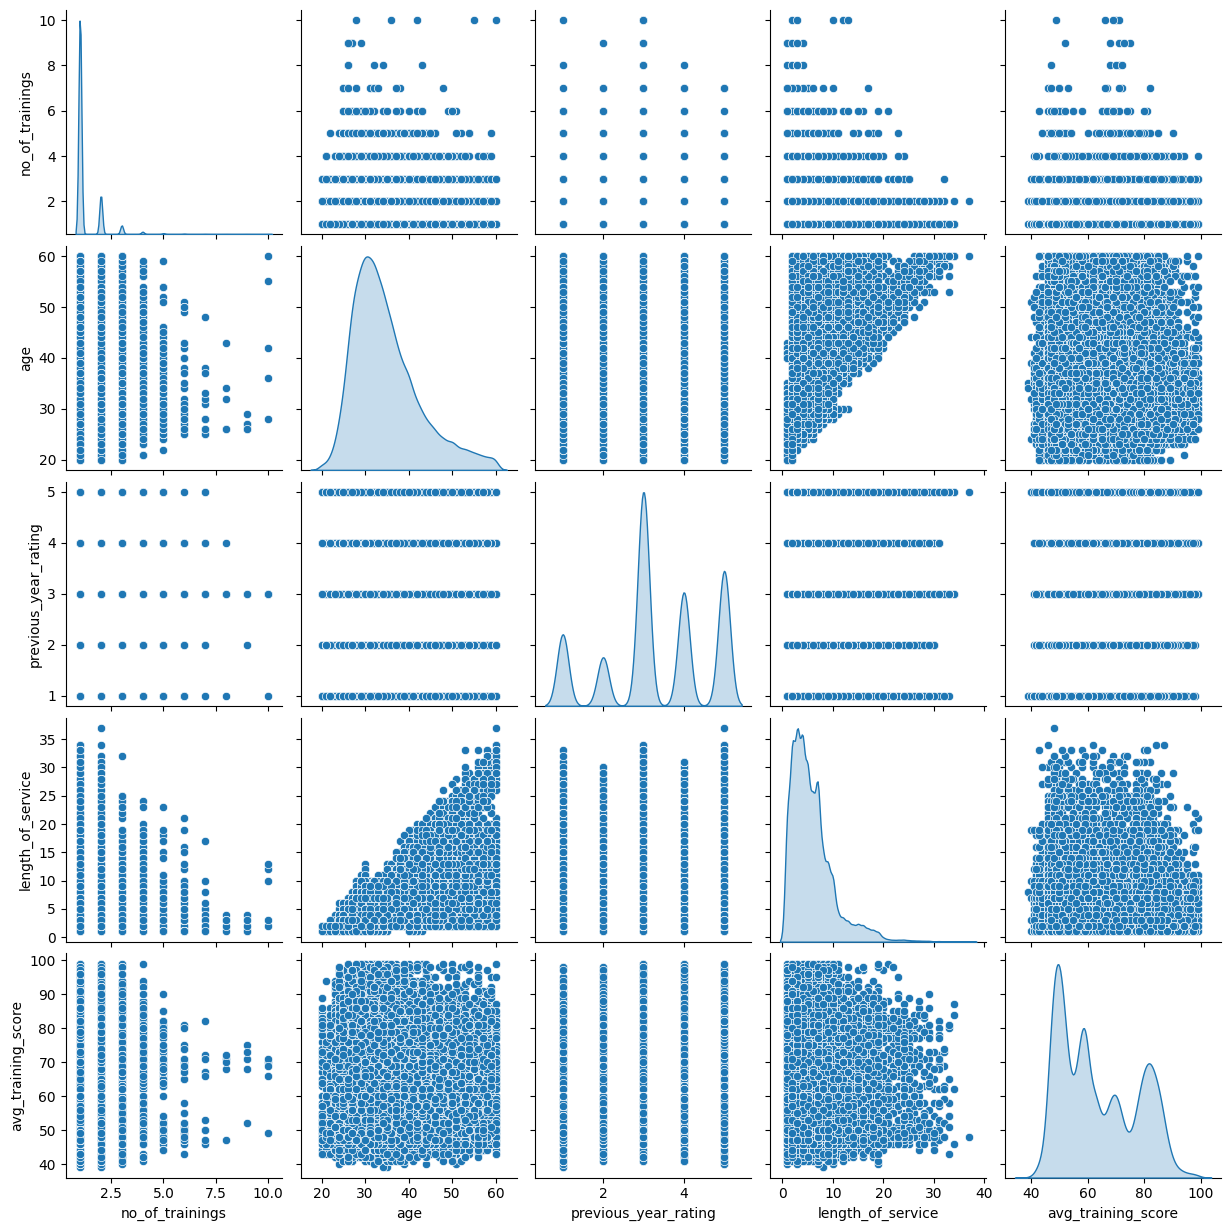

In [ ]:
sns.pairplot(data=data[num_var], diag_kind="kde")
plt.show()

## Data Preprocessing

### Outlier detection

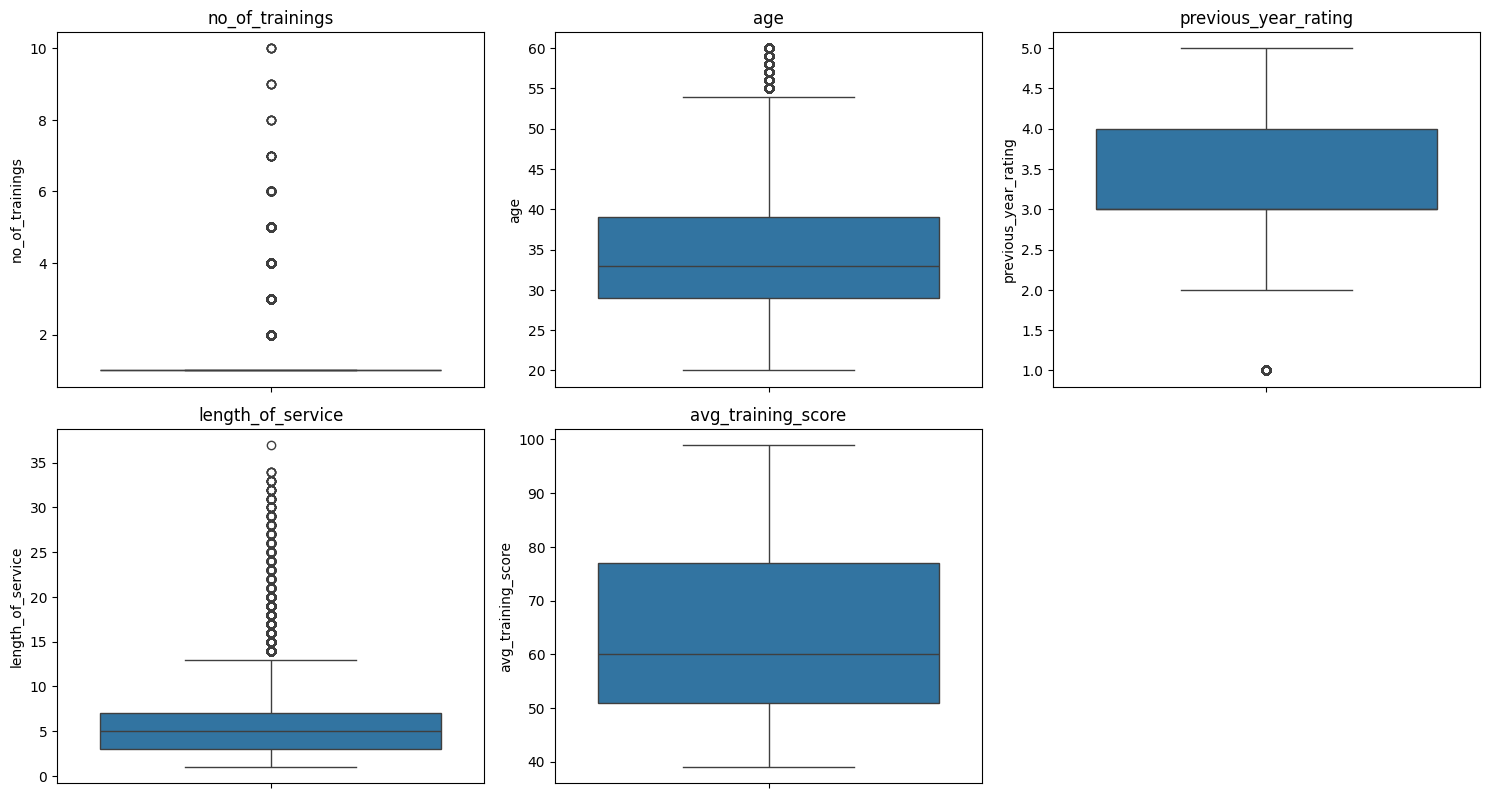

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- All numerical columns have outliers
- However, we will not treat them as they are proper values.

### Feature Engineering

In [ ]:
data1 = data.copy()

In [ ]:
# we need to pass numerical values for each categorical column for imputation so we will label encode them
gender = {"m": 0, "f": 1}
data1["gender"] = data1["gender"].map(gender)

department = {"Sales & Marketing": 0, "Operations": 1, "Technology": 2, "Procurement": 3, "Analytics": 4, "Finance": 5, "HR": 6, "Legal": 7, "R&D": 8}
data1["department"] = data1["department"].map(department)

recruitment_channel = {"sourcing": 0, "other": 1, "referred": 2}
data1["recruitment_channel"] = data1["recruitment_channel"].map(recruitment_channel)

education = {
    "Master's & above": 0,
    "Bachelor's": 1,
    "Below Secondary": 2,
}
data1["education"] = data1["education"].map(education)

region = {
    "region_1": 0,
    "region_2": 1,
    "region_3": 2,
    "region_4": 3,
    "region_5": 4,
    "region_6": 5,
    "region_7": 6,
    "region_8": 7,
    "region_9": 8,
    "region_10": 9,
    "region_11": 10,
    "region_12": 11,
    "region_13": 12,
    "region_14": 13,
    "region_15": 14,
    "region_16": 15,
    "region_17": 16,
    "region_18": 17,
    "region_19": 18,
    "region_20": 19,
    "region_21": 20,
    "region_22": 21,
    "region_23": 22,
    "region_24": 23,
    "region_25": 24,
    "region_26": 25,
    "region_27": 26,
    "region_28": 27,
    "region_29": 28,
    "region_30": 29,
    "region_31": 30,
    "region_32": 31,
    "region_33": 32,
    "region_34": 33,
}
data1["region"] = data1["region"].map(region)

awards_won = {
    "no": 0,
    "yes": 1,
}
data1["awards_won"] = data1["awards_won"].map(awards_won)

is_promoted = {
    "no": 0,
    "yes": 1,
}
data1["is_promoted"] = data1["is_promoted"].map(is_promoted)

- Values are encoded.
- We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage


In [ ]:
data1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,0,6,0.000,1,0,1,35,5.000,8,0,49.000,0
1,1,21,1.000,0,1,1,30,5.000,4,0,60.000,0
2,0,18,1.000,0,0,1,34,3.000,7,0,50.000,0
3,0,22,1.000,0,1,2,39,1.000,10,0,50.000,0
4,2,25,1.000,0,1,1,45,3.000,2,0,73.000,0


### Train-Test Split

In [ ]:
X = data1.drop(["is_promoted"], axis=1)
y = data1["is_promoted"]

In [ ]:
X = X.astype(float)

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(32884, 11) (10962, 11) (10962, 11)


### Missing value imputation

In [ ]:
data1.isnull().sum()

,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
awards_won,0


In [ ]:
# Defining the imputers for numerical and categorical variables
imputer_mode = SimpleImputer(strategy="most_frequent")
imputer_median = SimpleImputer(strategy="median")

**Impute categorical columns**

In [ ]:
# Fit and transform the train data
X_train[["education"]] = imputer_mode.fit_transform(X_train[["education"]])

# Transform the validation data
X_val[["education"]]  =  imputer_mode.fit_transform(X_val[["education"]])

# Transform the test data
X_test[["education"]] = imputer_mode.fit_transform(X_test[["education"]])


**Impute numerical columns**

In [ ]:
# Fit and transform the train data
X_train[["previous_year_rating", "avg_training_score"]] = imputer_median.fit_transform(
    X_train[["previous_year_rating", "avg_training_score"]]
)

# Transform the validation data
X_val[["previous_year_rating", "avg_training_score"]] = imputer_median.fit_transform(
    X_val[["previous_year_rating", "avg_training_score"]]
)

# Transform the test data
X_test[["previous_year_rating", "avg_training_score"]] = imputer_median.fit_transform(
    X_test[["previous_year_rating", "avg_training_score"]]
)

In [ ]:
# Checking that no column has missing values in train, validation and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64


- All missing values have been treated with mode for categorical column and median for numerical columns.
- Next we inverse map the encoded values.

### Reverse Mapping for Encoded Categorical Variables

In [ ]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [ ]:
inverse_mapping(gender, "gender")
inverse_mapping(department, "department")
inverse_mapping(education, "education")
inverse_mapping(recruitment_channel, "recruitment_channel")
inverse_mapping(awards_won, "awards_won")
inverse_mapping(region, "region")


#### Train Dataset

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

department
Sales & Marketing    9989
Operations           6746
Technology           4383
Procurement          4330
Analytics            3173
Finance              1570
HR                   1482
R&D                   613
Legal                 598
Name: count, dtype: int64
******************************
region
region_2     7351
region_22    3867
region_7     2973
region_15    1706
region_13    1584
region_26    1344
region_31    1132
region_4      987
region_27     983
region_16     893
region_11     799
region_28     780
region_23     688
region_29     601
region_32     577
region_19     533
region_20     525
region_14     510
region_17     498
region_25     480
region_5      442
region_8      411
region_6      408
region_10     407
region_30     396
region_1      368
region_12     312
region_24     306
region_9      242
region_21     230
region_3      212
region_34     167
region_33     155
region_18      17
Name: count, dtype: int64
******************************
education
Bachelor's  

#### Validation Dataset

In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

department
Sales & Marketing    3454
Operations           2315
Procurement          1392
Technology           1364
Analytics            1072
Finance               485
HR                    456
Legal                 227
R&D                   197
Name: count, dtype: int64
******************************
region
region_2     2478
region_22    1262
region_7      915
region_15     557
region_13     533
region_26     466
region_31     431
region_27     358
region_4      351
region_16     288
region_11     262
region_28     252
region_23     248
region_32     201
region_29     201
region_19     176
region_20     171
region_14     167
region_25     156
region_5      154
region_17     149
region_6      138
region_1      133
region_30     132
region_8      126
region_10     119
region_24     106
region_21      93
region_12      86
region_9       83
region_3       62
region_33      60
region_34      44
region_18       4
Name: count, dtype: int64
******************************
education
Bachelor's  

#### Test Dataset

In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

department
Sales & Marketing    3397
Operations           2287
Procurement          1416
Technology           1391
Analytics            1107
Finance               481
HR                    480
Legal                 214
R&D                   189
Name: count, dtype: int64
******************************
region
region_2     2514
region_22    1299
region_7      955
region_15     545
region_13     531
region_26     450
region_31     372
region_4      365
region_27     318
region_28     286
region_16     284
region_11     254
region_23     239
region_29     192
region_25     183
region_5      170
region_32     167
region_19     165
region_20     154
region_14     150
region_17     149
region_6      144
region_30     129
region_10     122
region_8      118
region_1      109
region_12     102
region_24      96
region_9       95
region_21      88
region_34      81
region_3       72
region_33      54
region_18      10
Name: count, dtype: int64
******************************
education
Bachelor's  

### Creating Dummy Variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(32884, 52) (10962, 52) (10962, 52)


In [ ]:
X_train.head().T

,24986,42259,51748,48031,36827
no_of_trainings,2.000,1.000,2.000,1.000,1.000
age,34.000,35.000,28.000,38.000,39.000
previous_year_rating,3.000,3.000,4.000,1.000,5.000
length_of_service,4.000,10.000,3.000,9.000,12.000
avg_training_score,85.000,65.000,50.000,51.000,88.000
department_Finance,False,False,False,False,False
department_HR,False,False,False,False,False
department_Legal,False,False,False,False,False
department_Operations,False,False,False,False,False
department_Procurement,False,True,False,False,False


## Building the model

### Model evaluation criterion

**Model can make wrong predictions as:**

- Predicting an employee should get promoted when he/she should not get promoted
- Predicting an employee should not get promoted when he/she should get promoted

**Which case is more important?**

- Both cases are important here as not promoting a deserving employee might lead to less productivity and the company might lose a good employee which affects the company's growth. Further, giving promotion to a non-deserving employee would lead to loss of monetary resources and giving such employee higher responsibility might again affect the company's growth.

**How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

- Company would want `F1-score` to be maximized, as both classes are important here. Hence, the focus should be on increasing the F1-score rather than focusing on just one metric i.e. Recall or Precision.

**First, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred, average="macro")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Initial Model Building

#### Model Building - Original Data

In [ ]:
# Define models list and append models to it
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Empty lists to store all model's CV scores and names
results = []  # To store cross-validation results
names = []  # To store names of models

# Loop through all models to get the mean cross-validated score
print("\nCross-Validation Cost:\n")
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print(f"{name}: {cv_result.mean()}")


Cross-Validation Cost:

Bagging: 0.4253339907590906
Random forest: 0.3728299955738187
GBM: 0.42476596896201535
Adaboost: 0.2750735760794448
dtree: 0.3586262565025596


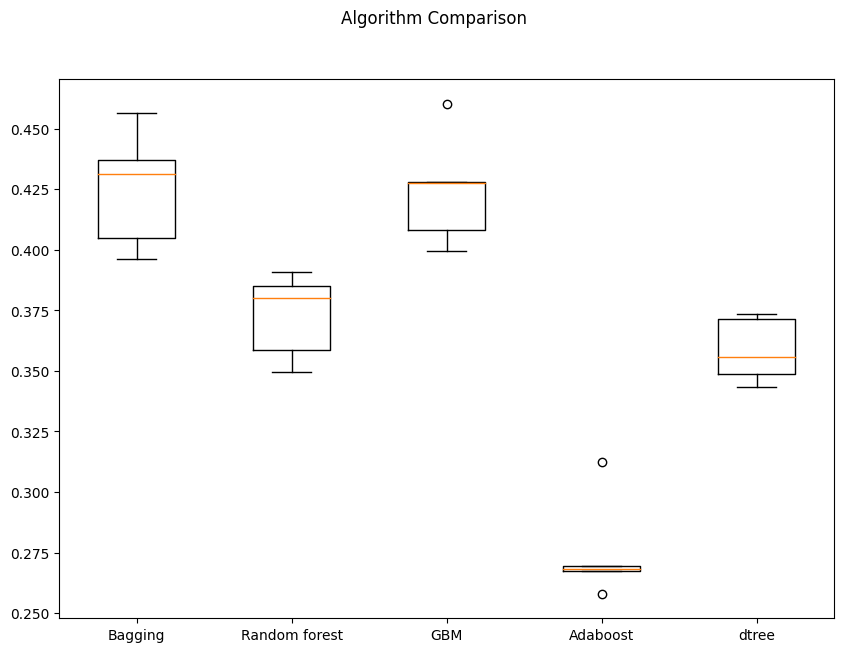

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9239, Validation Score: 0.4289, Difference: 0.4950
Random forest: Training Score: 0.9980, Validation Score: 0.3885, Difference: 0.6095
GBM: Training Score: 0.4367, Validation Score: 0.4306, Difference: 0.0062
Adaboost: Training Score: 0.2792, Validation Score: 0.2627, Difference: 0.0165
dtree: Training Score: 0.9982, Validation Score: 0.3639, Difference: 0.6343


-	From the above results it is observed that the difference shown is difference between f1 score in training set and validation data set.
-	Bagging, random forest and decision tree models have best f1 score in training data but their values get reduced in validation set. The difference is >50% which is not good.
-	Gradient boosting and Ada boosting have 44% and 28% f1 score in training data which is moderate results. Their validation scores are 43% and 26% respectively. F1 score difference between these two data sets were 1% and 2% respectively which is the best results.
-	Gradient boosting model has the best performance followed by AdaBoost model as per the validation performance in original data.


#### Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 2800
Before Oversampling, counts of label 'No': 30084 

After Oversampling, counts of label 'Yes': 30084
After Oversampling, counts of label 'No': 30084 

After Oversampling, the shape of train_X: (60168, 52)
After Oversampling, the shape of train_y: (60168,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

# Empty lists to store all model's CV scores and names
results = []  # To store cross-validation results
names = []  # To store names of models

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Loop through all models to get the mean cross-validated score
print("\nCross-Validation Cost:\n")
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5
    cv_result = cross_val_score(estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print(f"{name}: {cv_result.mean()}")


Cross-Validation Cost:

Bagging: 0.9525780413508234
Random forest: 0.9616990336618578
GBM: 0.8961619515163676
Adaboost: 0.8790389402112118
dtree: 0.9289778092140988


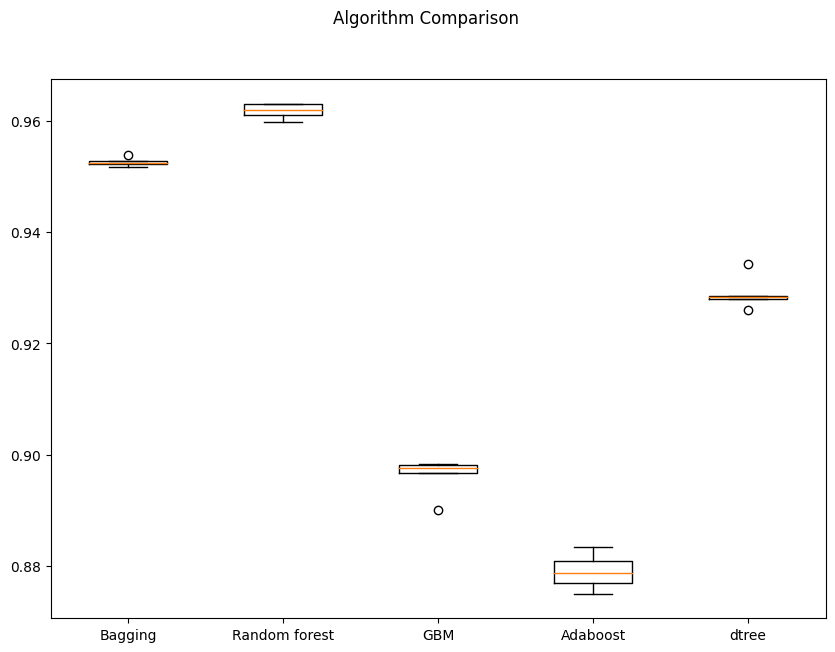

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = f1_score(y_train_over, model.predict(X_train_over))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9953, Validation Score: 0.3929, Difference: 0.6024
Random forest: Training Score: 0.9998, Validation Score: 0.3924, Difference: 0.6074
GBM: Training Score: 0.8980, Validation Score: 0.4043, Difference: 0.4937
Adaboost: Training Score: 0.8790, Validation Score: 0.3438, Difference: 0.5352
dtree: Training Score: 0.9998, Validation Score: 0.3385, Difference: 0.6613


-	From the above results it is observed that the difference shown is difference between f1 score in training set and validation data set.
-	Bagging, random forest and decision tree models have best f1 score in training data but their values get reduced in validation set. The difference is >60% which is not good.
-	Gradient boosting and Ada boosting have 89% and 88% f1 score in training data. Their validation score is 40% and 33% respectively. F1 score difference between these two data sets were 49% and 54% respectively which is the better results than other model.
-	Gradient boosting model has the best performance followed by AdaBoost model as per the validation performance in under sampled data.


#### Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 2800
Before Under Sampling, counts of label 'No': 30084 

After Under Sampling, counts of label 'Yes': 2800
After Under Sampling, counts of label 'No': 2800 

After Under Sampling, the shape of train_X: (5600, 52)
After Under Sampling, the shape of train_y: (5600,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

# Empty lists to store all model's CV scores and names
results = []  # To store cross-validation results
names = []  # To store names of models

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Loop through all models to get the mean cross-validated score
print("\nCross-Validation Cost:\n")
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5
    cv_result = cross_val_score(estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print(f"{name}: {cv_result.mean()}")


Cross-Validation Cost:

Bagging: 0.6623690644784096
Random forest: 0.6964649131873981
GBM: 0.687164871809949
Adaboost: 0.6866977420830566
dtree: 0.6546383760567258


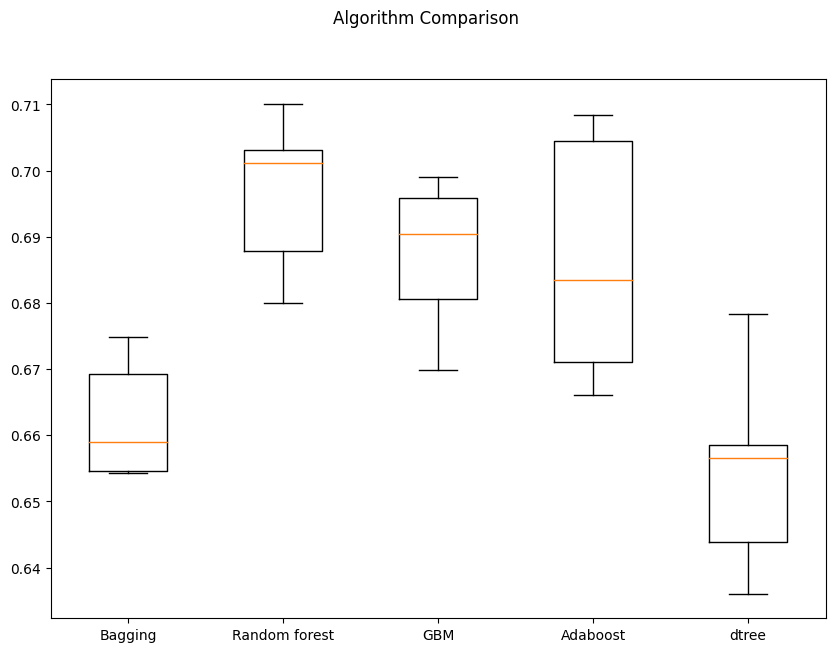

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = f1_score(y_train_un, model.predict(X_train_un))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9779, Validation Score: 0.2944, Difference: 0.6836
Random forest: Training Score: 0.9998, Validation Score: 0.3098, Difference: 0.6900
GBM: Training Score: 0.7159, Validation Score: 0.3571, Difference: 0.3588
Adaboost: Training Score: 0.6990, Validation Score: 0.3070, Difference: 0.3920
dtree: Training Score: 0.9998, Validation Score: 0.2341, Difference: 0.7657


-	From the above results it is observed that the difference shown is difference between f1 score in training set and validation data set.
-	Bagging, random forest and decision tree models have best f1 score in training data but their values get reduced in validation set. The difference is >65% which is not good.
-	Gradient boosting and Ada boosting have 72% and 70% f1 score in training data. Their validation score is 36% and 31% respectively. F1 score difference between these two data sets were 36% and 40% respectively which is the better results than other model.
-	AdaBoost model has the best performance followed by Gradient boosting model as per the validation performance in under sampled data.

## Model Performance Improvement

#### Models for tuning

- After building 15 models, it was observed that both the GBM and Adaboost models trained on an undersampled and oversampled dataset exhibited strong performance on validation datasets.
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
- We will tune these models using the same undersampled or oversampled or orignal data.

### Hyperparameter Tuning

#### **Note**
1. Sample parameter grid has been provided to do necessary hyperparameter tuning. One can extend/reduce the parameter grid based on execution time and system configuration to try to improve the model performance further wherever needed.      
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning AdaBoost using Undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.68839820368131:
CPU times: user 1.69 s, sys: 187 ms, total: 1.88 s
Wall time: 39 s


In [ ]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.2,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=20, random_state=1)

In [ ]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(tuned_adb1, X_train_un, y_train_un)
print("Tuned Ada boost model on under sampled data \n")
adb1_train

Tuned Ada boost model on under sampled data 



,Accuracy,Recall,Precision,F1
0,0.698,0.511,0.817,0.687


In [ ]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
print("Tuned Ada boost model on under sampled data \n")
adb1_val

Tuned Ada boost model on under sampled data 



,Accuracy,Recall,Precision,F1
0,0.858,0.516,0.303,0.651


#### Tuning AdaBoost using Oversampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9222155983835305:
CPU times: user 9.97 s, sys: 1.11 s, total: 11.1 s
Wall time: 5min 56s


In [ ]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=30,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb2.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=1, n_estimators=30, random_state=1)

In [ ]:
# Checking model's performance on training set
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train_over, y_train_over)
print("Tuned Ada boost model on over sampled data \n")
adb2_train

Tuned Ada boost model on over sampled data 



,Accuracy,Recall,Precision,F1
0,0.850,0.827,0.868,0.850


In [ ]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_adb2, X_val, y_val)
print("Tuned Ada boost model on over sampled data \n")
adb2_val

Tuned Ada boost model on over sampled data 



,Accuracy,Recall,Precision,F1
0,0.839,0.449,0.251,0.615


#### Tuning AdaBoost using Original data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
tuned_adb3 = AdaBoostClassifier(
    random_state=1,
    n_estimators=30,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb3.fit(X_train, y_train)

In [ ]:
# Checking model's performance on training set
adb3_train = model_performance_classification_sklearn(tuned_adb3, X_train, y_train)
print("Tuned Ada boost model on original data \n")
adb3_train

In [ ]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_adb3, X_val, y_val)
print("Tuned Ada boost model on original data \n")
adb2_val

#### Tuning Gradient Boosting using Undersampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=1,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

NameError: name 'GradientBoostingClassifier' is not defined

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_train_un, y_train_un)
print("Tuned Gradient boosting model on under sampled data \n")
gbm1_train

In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
print("Tuned Gradient boosting model on under sampled data \n")
gbm1_val

#### Tuning Gradient Boosting using Oversampled data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over)
print("Tuned Gradient boosting model on over sampled data \n")
gbm2_train

NameError: name 'model_performance_classification_sklearn' is not defined

In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
print("Tuned Gradient boosting model on over sampled data \n")
gbm2_val

#### Tuning Gradient Boosting using Original data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
tuned_gbm3 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm3.fit(X_train, y_train)

In [ ]:
# Checking model's performance on training set
gbm3_train = model_performance_classification_sklearn(tuned_gbm3, X_train, y_train)
print("Tuned Gradient boosting model on original data \n")
gbm3_train

In [ ]:
# Checking model's performance on validation set
gbm3_val = model_performance_classification_sklearn(tuned_gbm3, X_val, y_val)
print("Tuned Gradient boosting model on original data \n")
gbm3_val

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        gbm3_train.T,
        adb1_train.T,
        adb2_train.T,
        adb3_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Oversampled data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df.T

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm1_val.T,
        gbm2_val.T,
        gbm3_val.T,
        adb1_val.T,
        adb2_val.T,
        gbm3_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Oversampled data",
    "AdaBoost trained with Original data",
]
print("Validation performance comparison:")
models_val_comp_df.T

Gradient boosting model trained with Oversampled data has higher F1 score and having best performnace in validation data.

### Final model performance on test set

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

Gradient boosting model trained with original data has generalised performance, so let's consider it as the best model.

In [ ]:
# Let's check the performance on test set
print("Tuned Gradient boosting model on original data \n")
model_performance_classification_sklearn(tuned_gbm3, X_test, y_test)

In [ ]:
print("Tuned Gradient boosting model on over sampled data \n")
confusion_matrix_sklearn(tuned_gbm3, X_test, y_test)

### Feature Importances

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
print(pd.DataFrame(importances, columns = ["Imp"],
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

## Business Insights and Conclusions


### Actionable Insights

-


### Recommendations

-